In [27]:
import os
import requests
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# URL of the file to download
url = "https://www.kaggle.com/datasets/shalfey/extended-crab-age-prediction/download?datasetVersionNumber=1"

In [4]:
# File path to save the downloaded file
file_path = "Crabs.csv"

In [5]:

def download_file(url, file_path):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print("File downloaded successfully.")
    else:
        print("Failed to download file.")

In [6]:
def check_and_download_file(url, file_path):
    if not os.path.isfile(file_path):
        download_file(url, file_path)
    else:
        print("File already exists.")

In [7]:
# Check if the file exists and download it if necessary
check_and_download_file(url, file_path)

File already exists.


In [6]:
df = pd.read_csv(file_path)

# Remove rows with "0" value
later in the EDA when we run the descriptive stats, we see that the min of many variables is 0.  This needs to be cleaned.

In [18]:
df.replace(0, float('nan'), inplace=True)
df.dropna(inplace=True)

# New Variables

Because many of the variables will be colinear, I want to produce two calculated variables called Volume and Density


In [19]:
# Volume
df['Volume'] = np.pi * (df['Diameter'] / 2)**2 * df['Height']

In [20]:
 # Density
df['Density'] = df['Weight'] / df['Volume']

In [21]:
print(df.shape)

(199852, 12)


In [22]:
# Get the count of NA values in each column
na_counts = df.isna().sum()
null_counts = df.isnull().sum()
print("NA counts:")
print(na_counts)
print("Null counts:")
print(null_counts)



NA counts:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Volume            0
Density           0
dtype: int64
Null counts:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Volume            0
Density           0
dtype: int64


In [23]:
# info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199852 entries, 1 to 199999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              199852 non-null  float64
 1   Sex             199852 non-null  object 
 2   Length          199852 non-null  float64
 3   Diameter        199852 non-null  float64
 4   Height          199852 non-null  float64
 5   Weight          199852 non-null  float64
 6   Shucked Weight  199852 non-null  float64
 7   Viscera Weight  199852 non-null  float64
 8   Shell Weight    199852 non-null  float64
 9   Age             199852 non-null  float64
 10  Volume          199852 non-null  float64
 11  Density         199852 non-null  float64
dtypes: float64(11), object(1)
memory usage: 19.8+ MB
None


In [34]:
df.head()

id Sex  Length  Diameter  Height     Weight  Shucked Weight  \
1  1.0   I  1.2375    1.0000  0.3750  21.885814        7.654365   
2  2.0   F  1.4500    1.1625  0.4125  28.250277       11.127179   
3  3.0   I  1.3500    1.0250  0.3750  21.588144        9.738053   
4  4.0   I  1.1375    0.8750  0.2875  14.968536        5.953395   
5  5.0   F  1.4875    1.1875  0.4000  28.335325       12.048538   

   Viscera Weight  Shell Weight   Age    Volume    Density  
1        3.798833      7.654365  19.0  0.294524  74.309024  
2        7.016501      7.257472  11.0  0.437824  64.524248  
3        4.110678      6.378637   9.0  0.309435  69.766419  
4        2.962523      3.713785   8.0  0.172880  86.583570  
5        7.668540      8.504850  10.0  0.443014  63.960388

In [25]:
# Descriptive statistics
print(df.describe())

                  id         Length       Diameter         Height  \
count  199852.000000  199852.000000  199852.000000  199852.000000   
mean    99996.314633       1.313000       1.020788       0.346273   
std     57734.152658       0.289181       0.238135       0.090756   
min         1.000000       0.187500       0.112500       0.012500   
25%     49996.750000       1.150000       0.875000       0.287500   
50%     99999.500000       1.375000       1.075000       0.362500   
75%    149994.250000       1.525000       1.200000       0.412500   
max    199999.000000       7.583491       2.250000       2.825000   

              Weight  Shucked Weight  Viscera Weight   Shell Weight  \
count  199852.000000   199852.000000   199852.000000  199852.000000   
mean       23.138912        9.996106        4.996516       6.638642   
std        12.589390        5.600855        2.783996       3.554264   
min         0.028349        0.014175        0.014175       0.042524   
25%        13.168343   

In [35]:
# Group the dataset by sex and age
grouped = df.groupby(['Sex', 'Age'])

grouped.head()

id    Sex  Length  Diameter  Height     Weight  Shucked Weight  \
1            1.0      I  1.2375    1.0000  0.3750  21.885814        7.654365   
2            2.0      F  1.4500    1.1625  0.4125  28.250277       11.127179   
3            3.0      I  1.3500    1.0250  0.3750  21.588144        9.738053   
4            4.0      I  1.1375    0.8750  0.2875  14.968536        5.953395   
5            5.0      F  1.4875    1.1875  0.4000  28.335325       12.048538   
...          ...    ...     ...       ...     ...        ...             ...   
110925  110925.0      I  1.5750    1.1875  0.4500  31.609693       10.290869   
120061  120061.0      F  0.5125    0.3500  0.1250   0.992232        0.411068   
125049  125049.0  0.025  0.3875    0.2625  0.1500   0.411068        0.141747   
181596  181596.0      M  0.7375    0.5500  0.1750   3.813008        1.247378   
182550  182550.0      I  1.4500    1.1000  0.5125  33.480759       11.793392   

        Viscera Weight  Shell Weight   Age    Volume    Density  
1             3.798833      7.654365  19.0  0.294524  74.309024  
2             7.016501      7.257472  11.0  0.437824  64.524248  
3             4.110678      6.378637   9.0  0.309435  69.766419  
4             2.962523      3.713785   8.0  0.172880  86.583570  
5             7.668540      8.504850  10.0  0.443014  63.960388  
...                ...           ...   ...       ...        ...  
110925        7.271647     10.064072  22.0  0.498390  63.423563  
120061        0.226796      0.283495   4.0  0.012026  82.504467  
125049        0.099223      0.141747   4.0  0.008118  50.637663  
181596        1.077281      0.992232   2.0  0.041577  91.709511  
182550        6.988152      9.355335  27.0  0.487045  68.742636  

[382 rows x 12 columns]

In [47]:

ages = np.sort(df['Age'].unique())

# Perform t-test for each variable
variables = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Volume', 'Density']


for age in ages:
    print(f"\nAge: {age}")
    print("-------------------------")
    group = df[df['Age'] == age]
    for var in variables:
        group1 = group[group['Sex'] == 'M'][var]
        group2 = group[group['Sex'] == 'F'][var]
        # Check for missing values
        if group1.isnull().any() or group2.isnull().any():
            print(f"For Age={age}, Variable={var}: Missing values present")
            continue  # Skip the t-test if there are missing values

        # Check if there are sufficient data points in each group
        if len(group1) < 2 or len(group2) < 2:
            print(f"For Age={age}, Variable={var}: Insufficient data")
            continue  # Skip the t-test if there are fewer than two data points in any group

        # Perform t-test
        t_statistic, p_value = stats.ttest_ind(group1, group2)
        print(f"Age={age}, Variable={var}: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")

        if p_value < 0.05:
            print("Reject null")



Age: 1.0
-------------------------
For Age=1.0, Variable=Length: Insufficient data
For Age=1.0, Variable=Diameter: Insufficient data
For Age=1.0, Variable=Height: Insufficient data
For Age=1.0, Variable=Weight: Insufficient data
For Age=1.0, Variable=Shucked Weight: Insufficient data
For Age=1.0, Variable=Viscera Weight: Insufficient data
For Age=1.0, Variable=Shell Weight: Insufficient data
For Age=1.0, Variable=Volume: Insufficient data
For Age=1.0, Variable=Density: Insufficient data

Age: 2.0
-------------------------
For Age=2.0, Variable=Length: Insufficient data
For Age=2.0, Variable=Diameter: Insufficient data
For Age=2.0, Variable=Height: Insufficient data
For Age=2.0, Variable=Weight: Insufficient data
For Age=2.0, Variable=Shucked Weight: Insufficient data
For Age=2.0, Variable=Viscera Weight: Insufficient data
For Age=2.0, Variable=Shell Weight: Insufficient data
For Age=2.0, Variable=Volume: Insufficient data
For Age=2.0, Variable=Density: Insufficient data

Age: 3.0
----

# Notes on t tests

It appears that crabs aged 5-11 have sigificant size differences between sexes.  When they are first hatched *and* when they get older, the diffrence becomes scientifically insignificant.

In [ ]:
df_1 = df.drop('id', axis=1)

# 
correlation_matrix = df_1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [56]:
df_filtered = df[(~df['Sex'].isin(['I']))]
print(df_filtered.describe())
df_age_5_11 = df_filtered[df_filtered['Age'].between(5, 11)]
print(df_age_5_11.describe())
df_age_gt_11 = df_filtered[df_filtered['Age'] > 11]
print(df_age_gt_11.describe())

                  id         Length       Diameter         Height  \
count  133359.000000  133359.000000  133359.000000  133359.000000   
mean   100157.974107       1.450620       1.135104       0.389112   
std     57747.112731       0.188019       0.154390       0.063869   
min         2.000000       0.287500       0.175000       0.025000   
25%     50207.500000       1.350000       1.050000       0.350000   
50%    100264.000000       1.475000       1.162500       0.387500   
75%    150114.500000       1.575000       1.237500       0.425000   
max    199999.000000       7.583491       2.250000       2.267960   

              Weight  Shucked Weight  Viscera Weight   Shell Weight  \
count  133359.000000   133359.000000   133359.000000  133359.000000   
mean       29.045231       12.491748        6.292560       8.300722   
std        10.331400        4.789188        2.314326       2.903773   
min         0.411068        0.127573        0.077570       0.085048   
25%        22.481154   

In [67]:

# Perform t-test for each variable in df_age_gt_11
print("Age > 11")
print("-------------------------")
for var in variables:
    group1 = df_age_gt_11[df_age_gt_11['Sex'] == 'M'][var]
    group2 = df_age_gt_11[df_age_gt_11['Sex'] == 'F'][var]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"Variable: {var}")
    print(f"For Males and Females: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Reject null")
    print("-------------------------")

# Perform t-test for each variable in df_age_5_11
print("\nAge 5-11")
print("-------------------------")
for var in variables:
    group1 = df_age_5_11[df_age_5_11['Sex'] == 'M'][var]
    group2 = df_age_5_11[df_age_5_11['Sex'] == 'F'][var]
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    print(f"Variable: {var}")
    print(f"For Males and Females: t-statistic={t_statistic:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Reject null")
    print("-------------------------")


Age > 11
-------------------------
Variable: Length
For Males and Females: t-statistic=-4.442, p-value=0.000
Reject null
-------------------------
Variable: Diameter
For Males and Females: t-statistic=-4.507, p-value=0.000
Reject null
-------------------------
Variable: Height
For Males and Females: t-statistic=-5.652, p-value=0.000
Reject null
-------------------------
Variable: Weight
For Males and Females: t-statistic=-3.904, p-value=0.000
Reject null
-------------------------
Variable: Shucked Weight
For Males and Females: t-statistic=-0.070, p-value=0.944
-------------------------
Variable: Viscera Weight
For Males and Females: t-statistic=-5.611, p-value=0.000
Reject null
-------------------------
Variable: Shell Weight
For Males and Females: t-statistic=-5.591, p-value=0.000
Reject null
-------------------------
Variable: Volume
For Males and Females: t-statistic=-5.608, p-value=0.000
Reject null
-------------------------
Variable: Density
For Males and Females: t-statistic=5.02

# Notes on t testing subsets

I tested my two subsets expecting one to be significant an the other not to.  They are both significant.  I assume this is because of un-equal samples across ages.  this would nullify significance testing if age is not controlled for.

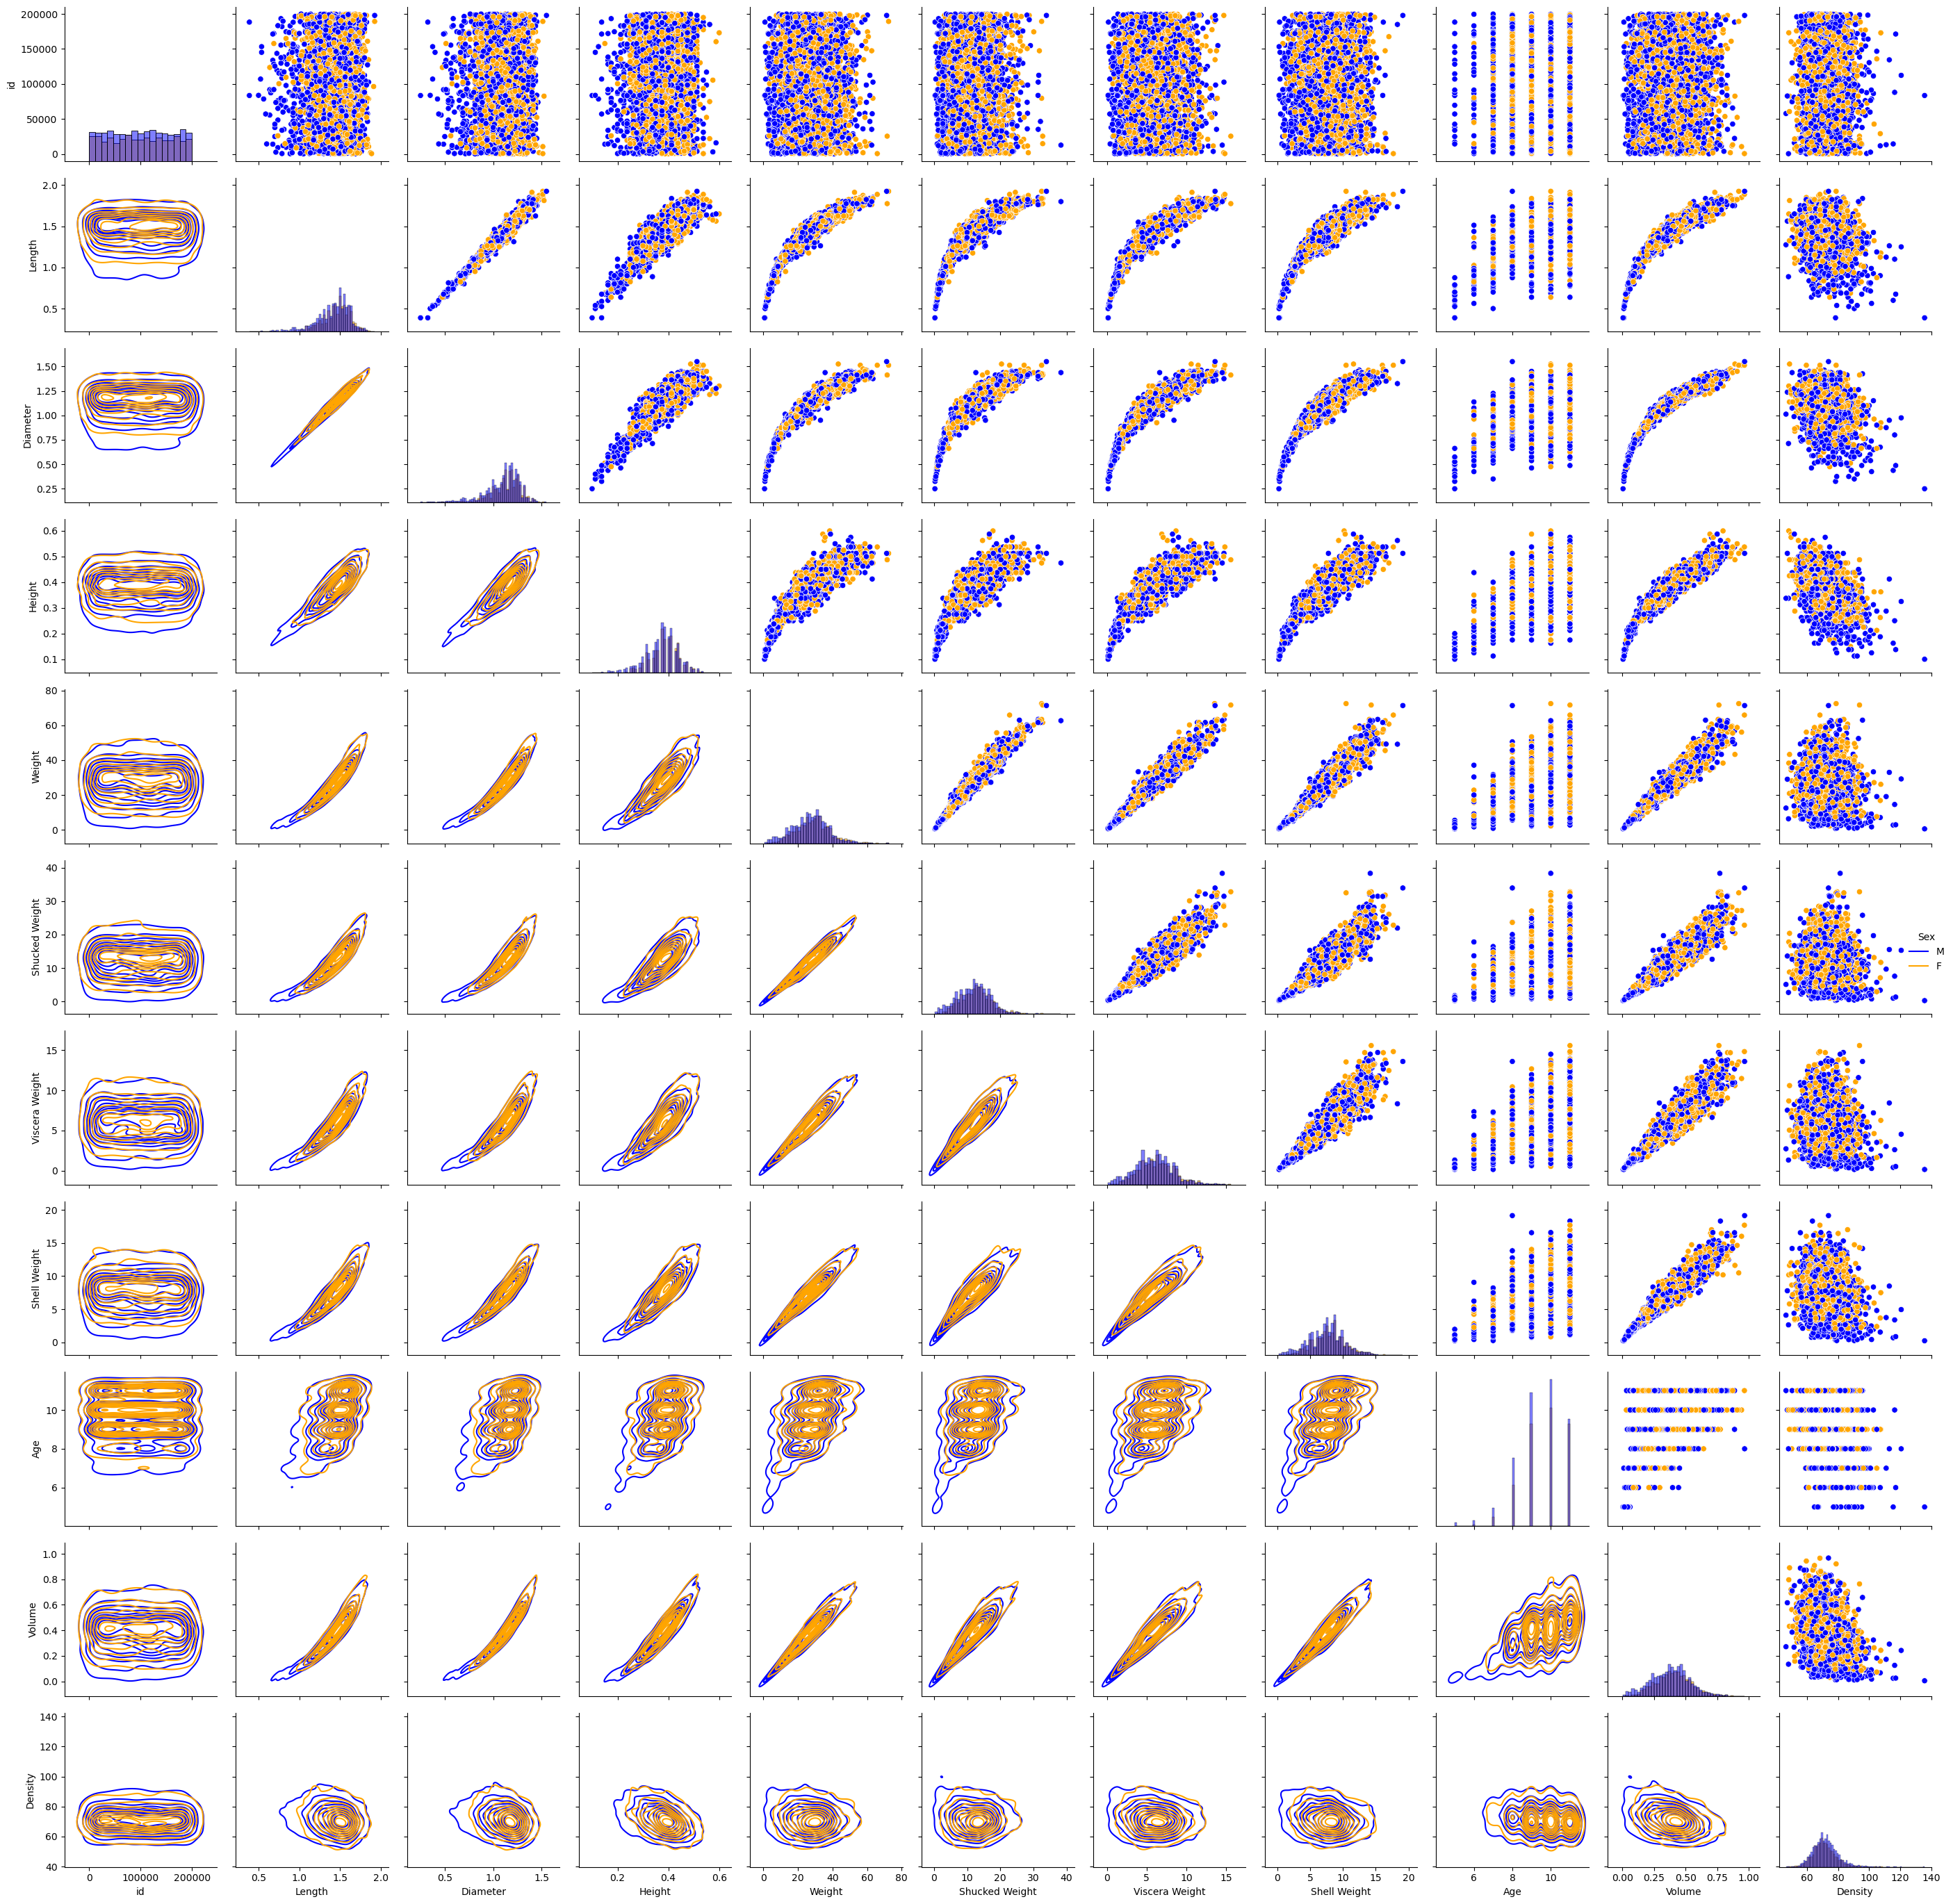

In [64]:
# pair grid for ages between 5 and 11
sample_size = 5000

# this takes too long to run.  for exploration, i will use a sample
df_age_5_11_sample = df_age_5_11.sample(n=sample_size)

g1 = sns.PairGrid(df_age_5_11_sample, hue='Sex', palette=['blue', 'orange'], hue_order=['M', 'F'])
g1.map_upper(sns.scatterplot)
g1.map_lower(sns.kdeplot)
g1.map_diag(sns.histplot)
g1.add_legend(title='Sex')

plt.tight_layout()
plt.show()



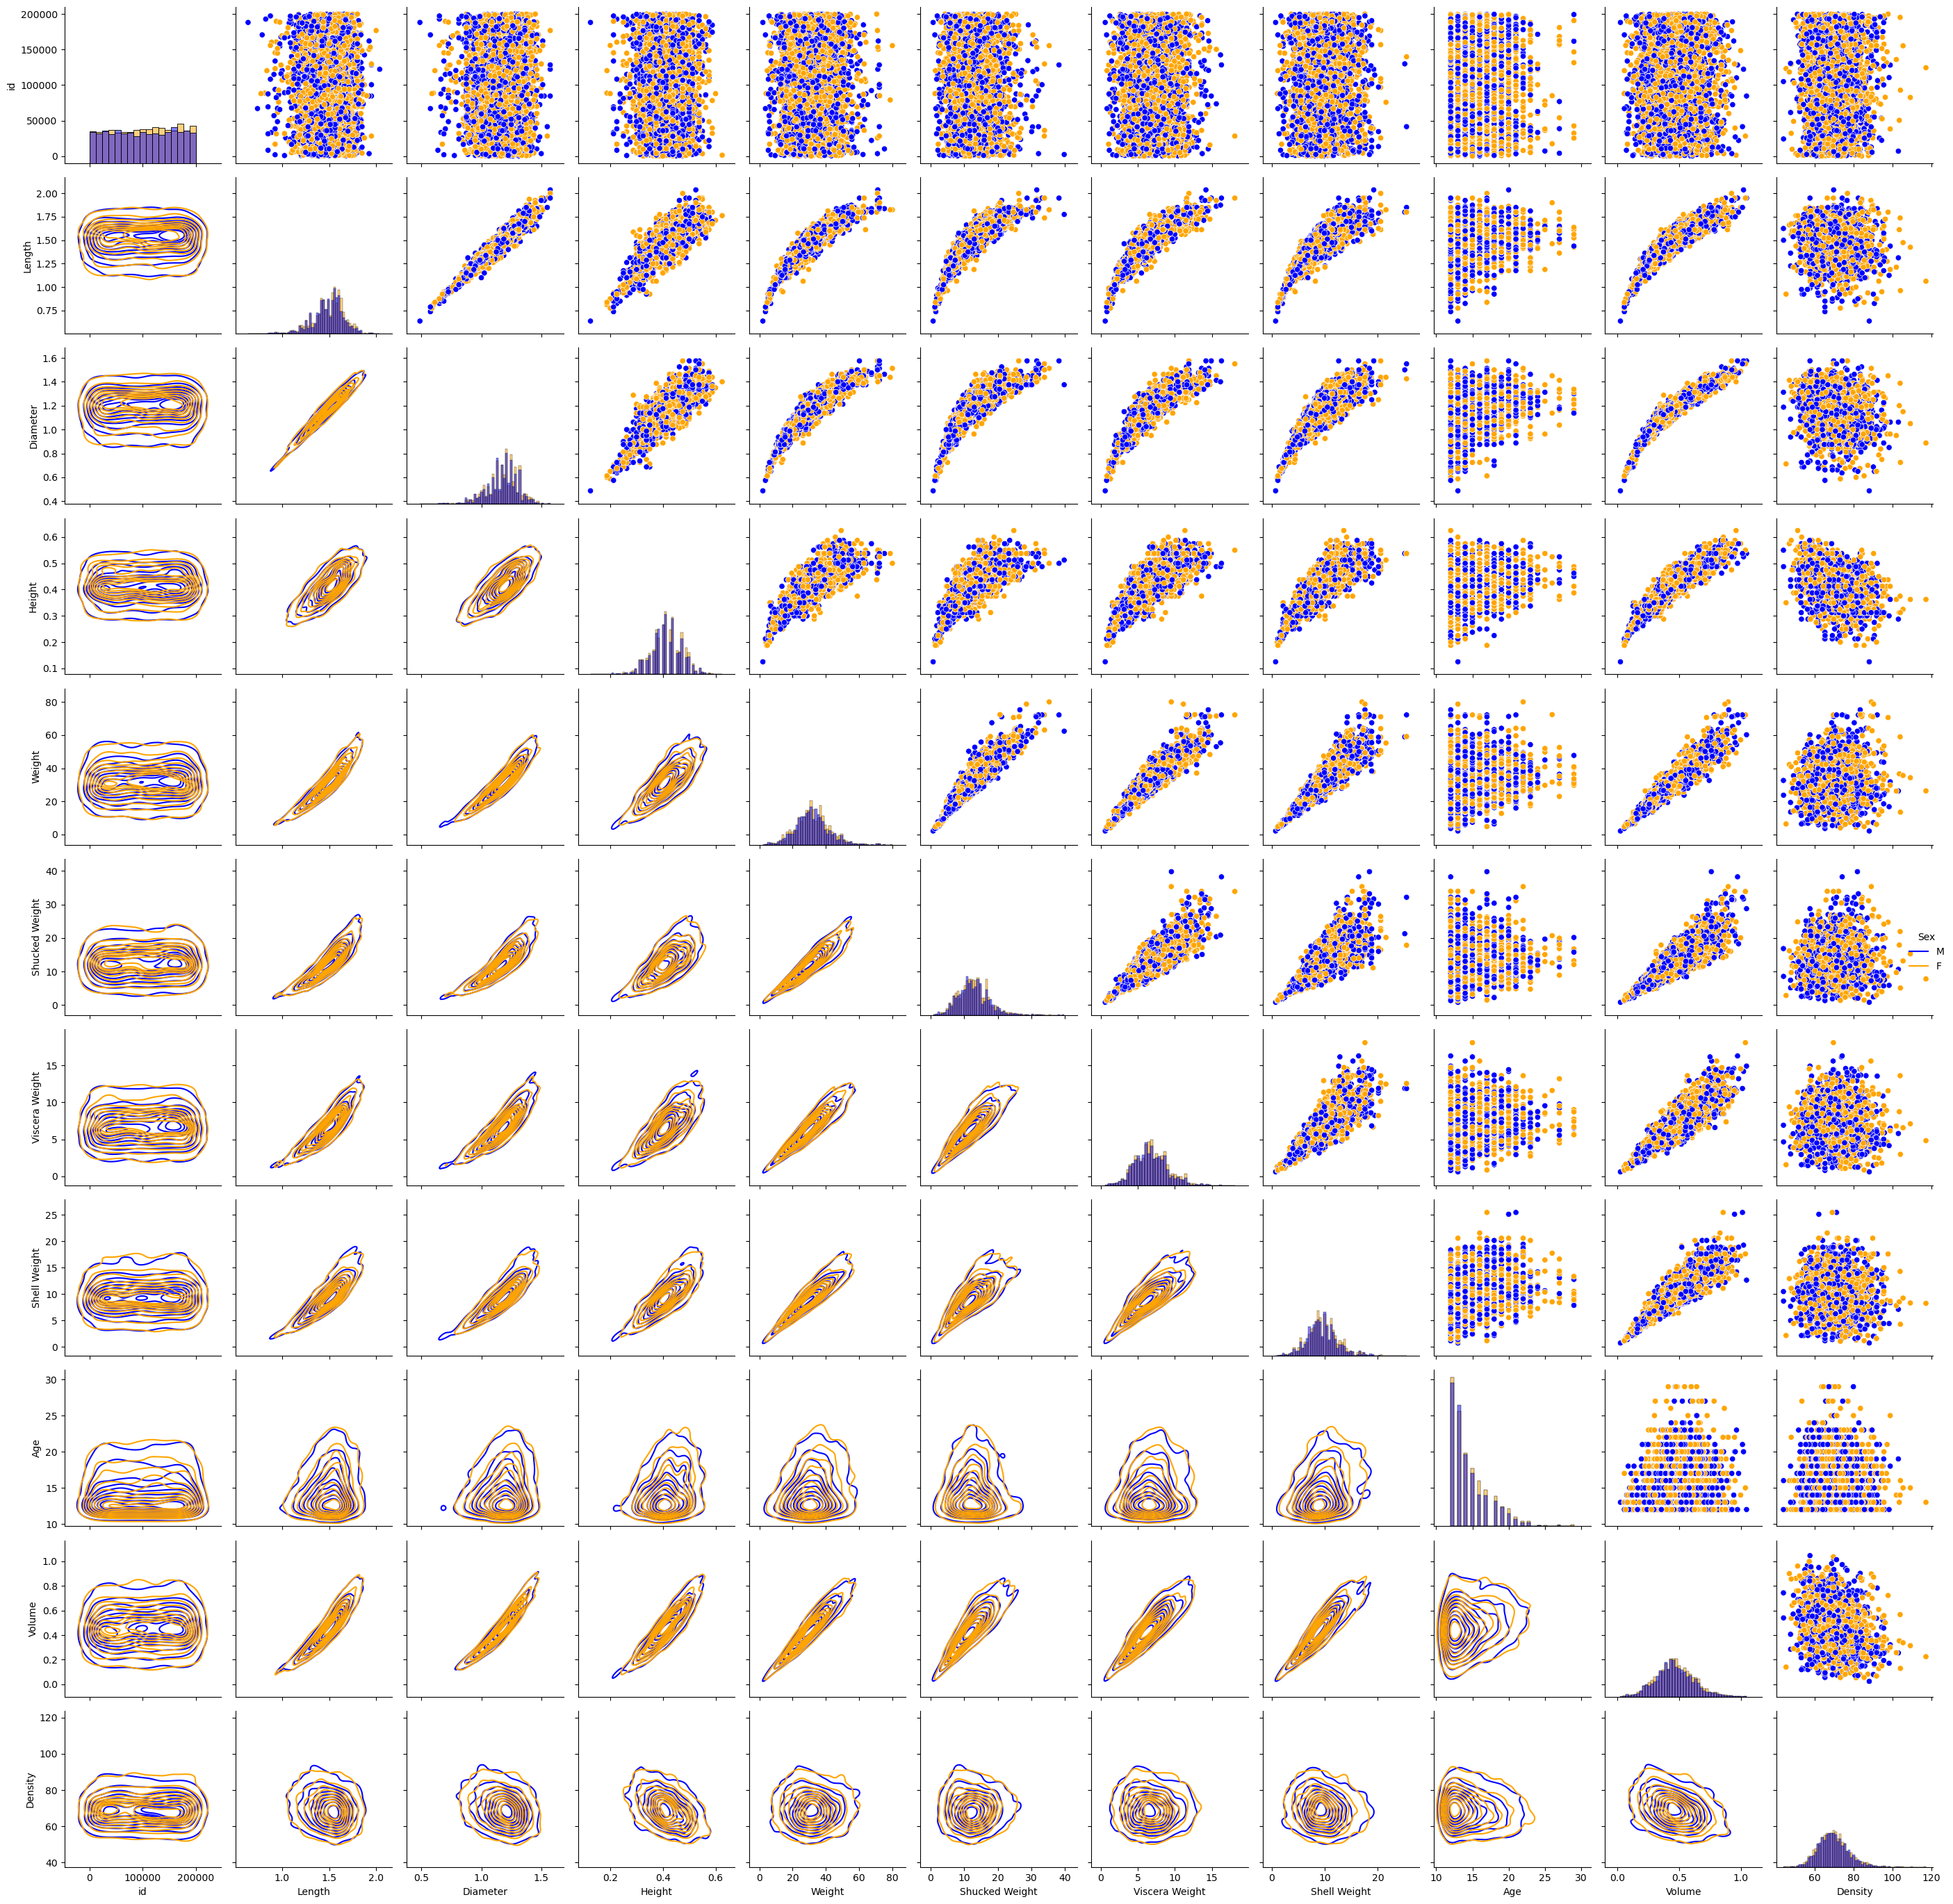

In [63]:
# pair grid for ages greater than 11
# this takes too long to run.  for exploration, i will use a sample
df_age_gt_11_sample = df_age_gt_11.sample(n=sample_size)

g2 = sns.PairGrid(df_age_gt_11_sample, hue='Sex', palette=['blue', 'orange'], hue_order=['M', 'F'])
g2.map_upper(sns.scatterplot)
g2.map_lower(sns.kdeplot)
g2.map_diag(sns.histplot)
g2.add_legend(title='Sex')

plt.tight_layout()
plt.show()


# Notes on Pair Plot

* The differences between sexes is not apparent visually here in the scatter plot.
* There when smoothed with Kernal Density Function, we pull visually separate the data a bit further and see that the males in the 5-11 dataset have a long tail on the the small side indicating that perhaps the females have a growth spurt before the males but it equals out by the time both are aged to full size.
* There are some interesting asymtote, liniar and curved relationships.  There appear to be finite sizes the crabs can reach.

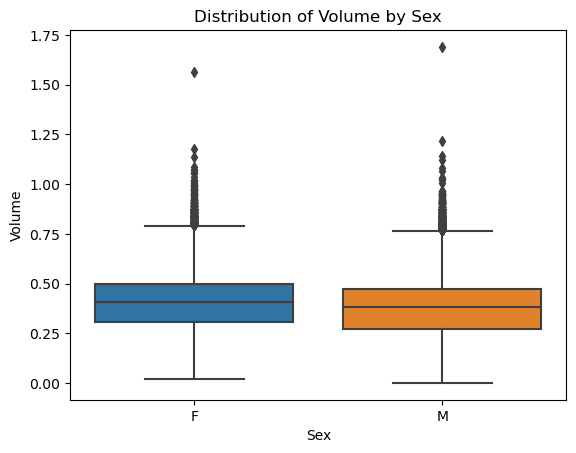

In [65]:


# Create a box plot to compare the distributions of Age for male and female crabs
sns.boxplot(x='Sex', y='Volume', data=df_age_5_11)

# Set plot labels
plt.xlabel('Sex')
plt.ylabel('Volume')

# Set plot title
plt.title('Distribution of Volume by Sex')

# Display the plot
plt.show()


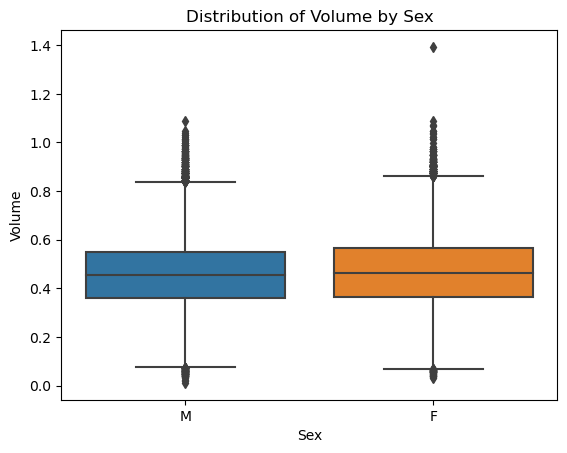

In [66]:
# Create a box plot to compare the distributions of Age for male and female crabs
sns.boxplot(x='Sex', y='Volume', data=df_age_gt_11)

# Set plot labels
plt.xlabel('Sex')
plt.ylabel('Volume')

# Set plot title
plt.title('Distribution of Volume by Sex')

# Display the plot
plt.show()

# notes on additional plots

Hard to spot differences in the sexes.  Will need to explore by age in order to really dig into it.